# Pertemuan 20 - Logistic Regression
---
## Tujuan Pembelajaran 
- Memahami kapan menggunakan logistic regression.

- Menjalankan logistic regression dengan Python.

- Menginterpretasi hasil model.

- Mengevaluasi performa model.


---

## Logistic Regression
Logistic Regression adalah algoritma supervised learning yang digunakan untuk masalah klasifikasi, terutama klasifikasi binary (dua kelas). Berbeda dengan linear regression yang memprediksi nilai kontinu, logistic regression memprediksi probabilitas suatu observasi masuk ke dalam kategori tertentu.

## Karakteristik Utama
- Menggunakan fungsi sigmoid untuk mengkonversi nilai linear ke probabilitas (0-1).

- Output berupa probabilitas yang dapat dikonversi ke prediksi binary.

- Berbasis pada konsep Maximum Likelihood Estimation (MLE).

- Tidak memerlukan asumsi normalitas seperti linear regression.

## Tujuan
- **Klasifikasi Binary**. Memprediksi apakah suatu event akan terjadi atau tidak

- **Estimasi Probabilitas**. Memberikan confidence level dalam prediksi

- **Identifikasi Faktor**. Mengetahui variabel mana yang paling berpengaruh

- **Decision Making**. Memberikan dasar pengambilan keputusan berbasis data

## Manfaat
- **Mudah diinterpretasi**. Koefisien memberikan insight yang jelas.

- **Tidak overfitting mudah**. Relatif stabil dengan dataset kecil.

- **Efisien secara komputasi**. Training dan prediksi cepat.

- **Probabilistic output**. Memberikan uncertainty measure.

- **Tidak butuh feature scaling**. Robust terhadap skala data yang berbeda.

## Kapan kita menggunakan Logistic Regression ?

### 1. Untuk menentukan Klasifikasi Binary

- Diagnosis medis: Sakit/Tidak Sakit.

- Email: Spam/Not Spam.

- Customer: Churn/Stay.

- Loan: Approve/Reject.

### 2. Butuh Interpretabilitas Tinggi
- Ketika stakeholder perlu memahami "mengapa" model membuat prediksi.

- Untuk compliance dan regulatory requirements.

- Dalam bidang medis, keuangan, atau hukum.

### 3. Dataset Berukuran Kecil-Sedang
- Logistic regression bekerja baik dengan ribuan sampai puluhan ribu data.

- Tidak memerlukan big data untuk performa yang baik.

### 4. Baseline Model
- Sebagai starting point sebelum mencoba algoritma yang lebih kompleks.

- Untuk membandingkan performa model yang lebih advanced.

### Jangan gunakan ketika 
- Masalah multiclass yang kompleks (gunakan multinomial atau algoritma lain).

- Relationship antar variabel sangat non-linear.

- Dataset sangat besar dengan jutaan features (pertimbangkan neural networks).


### Contoh dalam kehidupan sehari-hari
**"Apakah Pasien akan sembuh atau tidak ?"**
- Dataset: 100 pasien dengan gejala A, B, C.

- Target: Sembuh (1) atau Tidak Sembuh (0).

- Pertanyaan: Bisakah kita prediksi pasien baru?

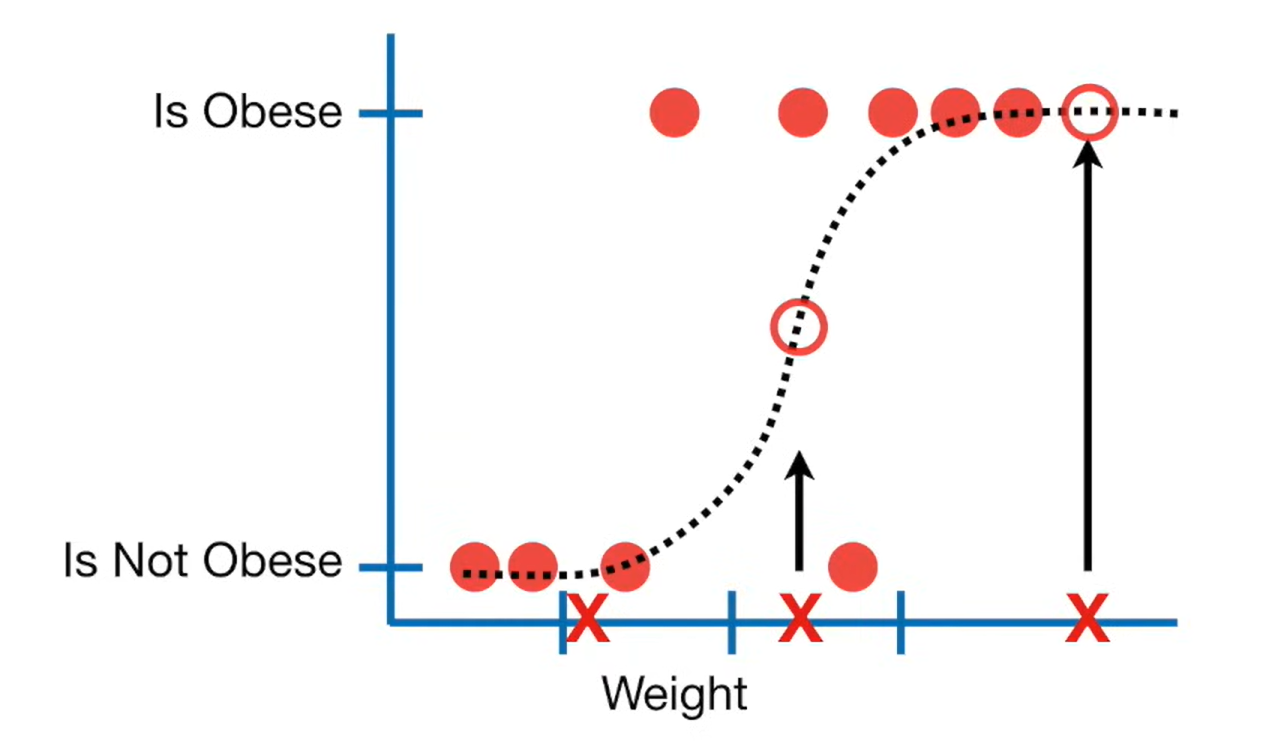

### Kenapa enggak pake Linear Regression aja ?
#### Linear Regression: Y = β₀ + β₁X
- Problem: Hasil bisa -5 atau 105 (tidak masuk akal untuk probabilitas!)

#### Solusi: Logistic Regression
- Output selalu antara 0 dan 1.

- Cocok untuk Yes/No, Sukses/Gagal, Positif/Negatif.

> Simple nya Linear regression seperti jalan lurus tanpa batas. Logistic regression seperti jalan yang melengkung dan berakhir di garis finish.

---

## Rumus Logistic Regression
### 1. Fungsi Sigmoid (Logistic Function)

```mathematica
P(Y=1|X) = 1 / (1 + e^(-z))

di mana:
z = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ
```
#### Komponen Rumus :
- P(Y=1|X): Probabilitas Y=1 given input X.

- e: Bilangan Euler (≈ 2.718).

- z: Linear combination dari features (disebut logit).

- β₀: Intercept (bias).

- β₁, β₂, ..., βₚ: Koefisien untuk setiap feature.

## 2. Logit Function (Kebalikan Sigmoid)
```mathematica
logit(p) = ln(p/(1-p)) = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ

di mana:
- p = probabilitas success
- ln = natural logarithm
- p/(1-p) = odds ratio
```

### 3. Odds dan Odds Ratio
``` mathematica
Odds = P(success) / P(failure) = p / (1-p)
Odds Ratio = e^βᵢ (untuk setiap koefisien βᵢ)
```

## Algoritma Training (Maximum Likelihood Estimation)
### 1. Langkah Pertama : Likelihood Function
```mathematica
L(β) = ∏ᵢ₌₁ⁿ [pᵢʸⁱ × (1-pᵢ)¹⁻ʸⁱ]

di mana:
- L(β) = Likelihood function
- pᵢ = P(Yᵢ=1|Xᵢ) untuk observasi ke-i  
- yᵢ = actual label (0 atau 1)
- n = jumlah observasi
```

### 2. Langkah kedua : Log-Likelihood (untuk kemudahan komputasi)
```mathematica
LL(β) = Σᵢ₌₁ⁿ [yᵢ×ln(pᵢ) + (1-yᵢ)×ln(1-pᵢ)]
```

### 3. Optimization (Gradient Descent/Newton-Raphson)
```mathematica
Tujuan: Maksimalkan LL(β) atau Minimalkan -LL(β)

Update rule (Gradient Descent):
βⱼ⁽ᵗ⁺¹⁾ = βⱼ⁽ᵗ⁾ + α × ∂LL/∂βⱼ

di mana:
- α = learning rate
- t = iteration ke-t
- ∂LL/∂βⱼ = partial derivative likelihood terhadap βⱼ
```

### 4. Gradient Calculation
```mathematica
∂LL/∂βⱼ = Σᵢ₌₁ⁿ (yᵢ - pᵢ) × xᵢⱼ

di mana:
- (yᵢ - pᵢ) = error untuk observasi ke-i
- xᵢⱼ = nilai feature j untuk observasi ke-i
```

---

## Sigmoid Function - "Jantungnya" Logistic Regression
```lua
Kurva S (Sigmoid):
     1.0 ┤     ∞∞∞∞∞
         ┤   ∞∞
    0.5  ┤ ∞∞  <- threshold (decision boundary)
         ┤∞∞
     0.0 ┤∞∞∞∞∞
        z: -∞ ... -2 -1  0  1  2 ... +∞
```

**Properti Sigmoid :**
- Domain: z ∈ (-∞, +∞).

- Range: P ∈ (0, 1).

- Inflection point: z = 0, P = 0.5.

- Asimptot: P → 0 saat z → -∞, P → 1 saat z → +∞.

**Penjelasan Intuitif :**
- Input negatif besar → Output mendekati 0.

- Input 0 → Output = 0.5 (decision boundary).

- Input positif besar → Output mendekati 1.

- Selalu menghasilkan probabilitas valid (0-1).

## Interpretasi Koefisien & Odds Ratio

```python
# Hasil model: Prediksi kesembuhan pasien
# logit(P) = 2.5 + 0.8×umur - 1.2×merokok + 0.3×olahraga

Model equation:
P(sembuh) = 1/(1 + e^(-(2.5 + 0.8×umur - 1.2×merokok + 0.3×olahraga)))
```

**Interpretasi Koefisien :**

- β₀ = 2.5: Log-odds baseline ketika semua X = 0.

- β₁ = 0.8 (umur): Setiap kenaikan 1 tahun umur → log-odds naik 0.8.

- β₂ = -1.2 (merokok): Merokok → log-odds turun 1.2.

- β₃ = 0.3 (olahraga): Olahraga → log-odds naik 0.3.

**Odds Ratio (Lebih Mudah Dipahami) :**

- OR(umur) = e^0.8 = 2.23
→ Setiap kenaikan 1 tahun umur, odds sembuh naik 2.23 kali

- OR(merokok) = e^(-1.2) = 0.30
→ Merokok mengurangi odds sembuh menjadi 0.30 kali (70% lebih rendah)

- OR(olahraga) = e^0.3 = 1.35
→ Olahraga meningkatkan odds sembuh 1.35 kali (35% lebih tinggi)

**Aturan Emas interpretasi:**

- Koefisien positif → variabel meningkatkan peluang (OR > 1).

- Koefisien negatif → variabel menurunkan peluang (OR < 1).

- Semakin besar |β| → pengaruh semakin kuat.

---

## Implementasi (Hands On)

In [1]:
# setup libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('train.csv')
print(df.head())
print(df.info())

# Target: Survived (0=Tidak, 1=Ya)
# Features: Age, Sex, Pclass, Fare

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
# Data preprocessing

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())

# Convert categorical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Select features
X = df[['Age', 'Sex', 'Pclass', 'Fare']]
y = df['Survived']

In [3]:
# Train Model

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Show coefficients
print("Koefisien:", model.coef_[0])
print("Intercept:", model.intercept_[0])

Koefisien: [-2.51645337e-02  2.46563064e+00 -9.96364826e-01  1.18224793e-03]
Intercept: 1.5012281717925942


In [4]:
# Membuat Prediksi

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Example prediction
print("Contoh prediksi:")
print("Probabilitas:", y_pred_proba[0])
print("Prediksi final:", y_pred[0])

Contoh prediksi:
Probabilitas: [0.89793144 0.10206856]
Prediksi final: 0


In [5]:
# Interpretasi

# Interpretasi koefisien
features = ['Age', 'Sex', 'Pclass', 'Fare']
coefficients = model.coef_[0]

for feature, coef in zip(features, coefficients):
    direction = "meningkatkan" if coef > 0 else "menurunkan"
    print(f"{feature}: {coef:.3f} -> {direction} peluang survive")

Age: -0.025 -> menurunkan peluang survive
Sex: 2.466 -> meningkatkan peluang survive
Pclass: -0.996 -> menurunkan peluang survive
Fare: 0.001 -> meningkatkan peluang survive


In [15]:
# Prediksi: Wanita, umur 25, kelas 1, fare $50. Apakah akan survive?"

new_passenger = [[22, 1, 1, 500]]  # Age, Sex, Pclass, Fare
probability = model.predict_proba(new_passenger)
print(f"Peluang survive: {probability[0][1]:.3f}")

Peluang survive: 0.953


d:\laragon\bin\python\python-3.13\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [7]:
# Evalusasi model

# menentukan akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.804


Confusion Matrix:
[[90 15]
 [20 54]]


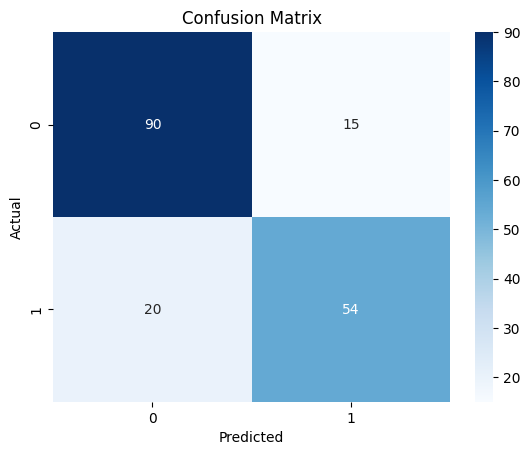

In [8]:
# confusin matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualisasi
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

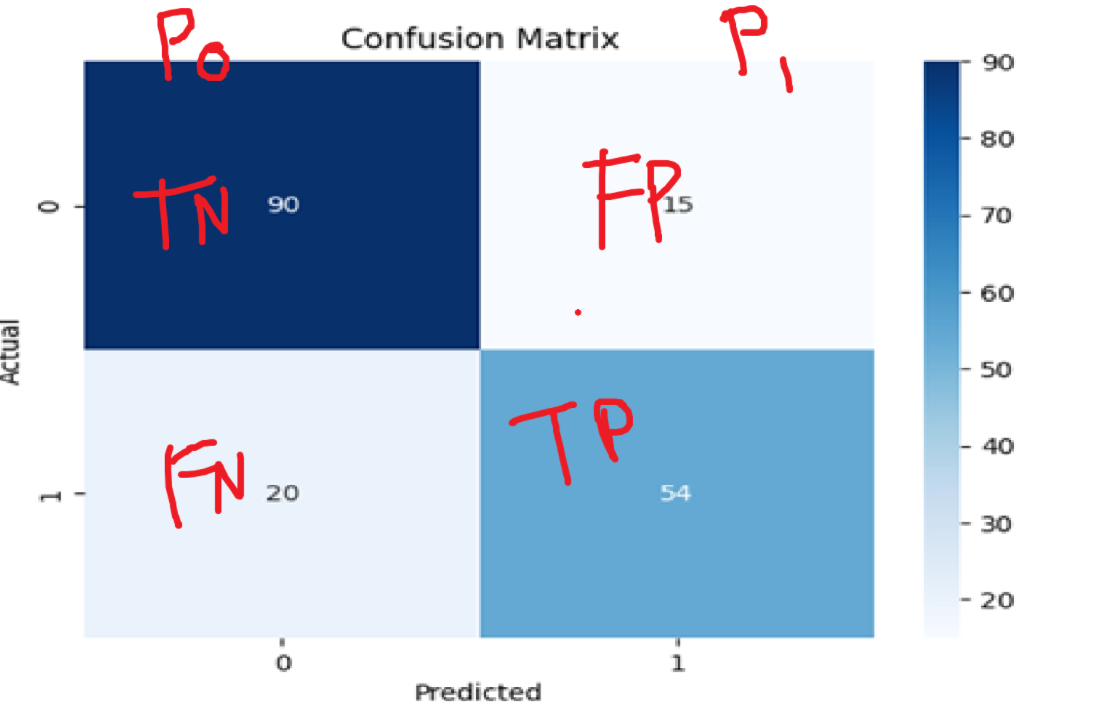

### Interpretasi Confusion Matrix
```lua
Predicted
               0    1
Actual    0   [TN] [FP]  <- TN: benar prediksi tidak survive
          1   [FN] [TP]  <- TP: benar prediksi survive
```

### Kapan Model bagus ?

**Rule of Thumb :**

- Accuracy > 70% → Lumayan

- Accuracy > 80% → Bagus

- Accuracy > 90% → Sangat bagus (tapi hati-hati overfitting!)

**Yang Lebih Penting dari Accuracy:**

- Precision: Dari yang diprediksi positif, berapa yang benar?

- Recall: Dari yang benar-benar positif, berapa yang berhasil ditangkap?

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



---

## Ringkasan

### Logistic Regression 

Algoritma klasifikasi yang menggunakan sigmoid function untuk memprediksi probabilitas (Binary Classification).

Rumus Inti :

```mathematica
P(Y=1|X) = 1 / (1 + e^(-(β₀ + β₁X₁ + β₂X₂ + ...)))
```

**Kapan digunakan :**
- Klasifikasi binary (Ya/Tidak, Positif/Negatif)

- Butuh interpretabilitas tinggi

- Dataset kecil-sedang

- Baseline model

**Key Benefits :**
- Output probabilitas (0-1)

- Koefisien mudah diinterpretasi

- Tidak prone overfitting

- Efisien komputasi

### Formula Cheat Sheet

#### Rumus dasar 
```mathematica
1. Sigmoid: P = 1/(1 + e^(-z))
2. Logit: z = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ  
3. Odds: Odds = p/(1-p)
4. Odds Ratio: OR = e^β
5. Log-Likelihood: LL = Σ[y×ln(p) + (1-y)×ln(1-p)]
```

#### Interpretasi
```mathematica
- β > 0: Meningkatkan peluang (OR > 1)
- β < 0: Menurunkan peluang (OR < 1)  
- β = 0: Tidak ada pengaruh (OR = 1)
- |β| besar: Pengaruh kuat
```

---

## Latihan (Heart Disease Prediction)

## Setup dan Load Data

In [ ]:
# Setup libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart.csv')
print(df.head())
print(df.info())

### Info Dataset Heart Disease
- age: Umur pasien

- sex: Jenis kelamin (1 = male, 0 = female)

- cp: Chest pain type (0-3)

- trestbps: Resting blood pressure

- chol: Serum cholesterol

- fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

- restecg: Resting electrocardiographic results (0-2)

- thalach: Maximum heart rate achieved

- exang: Exercise induced angina (1 = yes, 0 = no)

- oldpeak: ST depression induced by exercise

- slope: Slope of peak exercise ST segment (0-2)

- ca: Number of major vessels colored by fluoroscopy (0-3)

- thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)

- target: Penyakit jantung (0 = tidak ada, 1 = ada) [TARGET VARIABLE]

---

In [ ]:
# 1. Menangani Missing Values

In [ ]:
# 2.  Eksplorasi Data

In [ ]:
# (Opsional) Korelasi

In [ ]:
# 3. Pre-processing: Pisah fitur & target

In [ ]:
# 4. Split data

In [ ]:
# 5. Scaling fitur numerik

In [ ]:
# 6. Membuat dan melatih model logistic regression


In [ ]:
# 7. Evaluasi model

In [ ]:
# 8. Menentukan Confusion Matrix

In [ ]:
# 9. ROC Curve & AUC (opsional)

---

## Jawaban

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)

# Load Data
df = pd.read_csv('heart.csv')
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [17]:
# 3. Cek dan tangani missing values
print(df.isnull().sum())
# Jika ada, bisa dilakukan drop atau imputasi sesuai kebutuhan

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


target
1    526
0    499
Name: count, dtype: int64


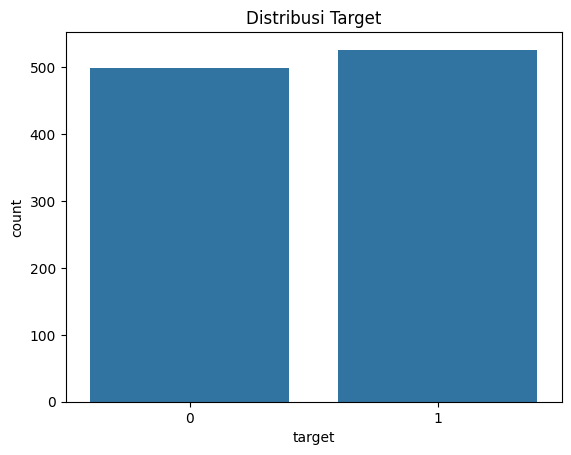

In [18]:
# 4. Eksplorasi Data
print(df['target'].value_counts())
sns.countplot(x='target', data=df); plt.title('Distribusi Target'); plt.show()

Label 0 ≈ 500 data → pasien tidak terdiagnosis penyakit jantung.

Label 1 ≈ 525 data → pasien terdiagnosis penyakit jantung.

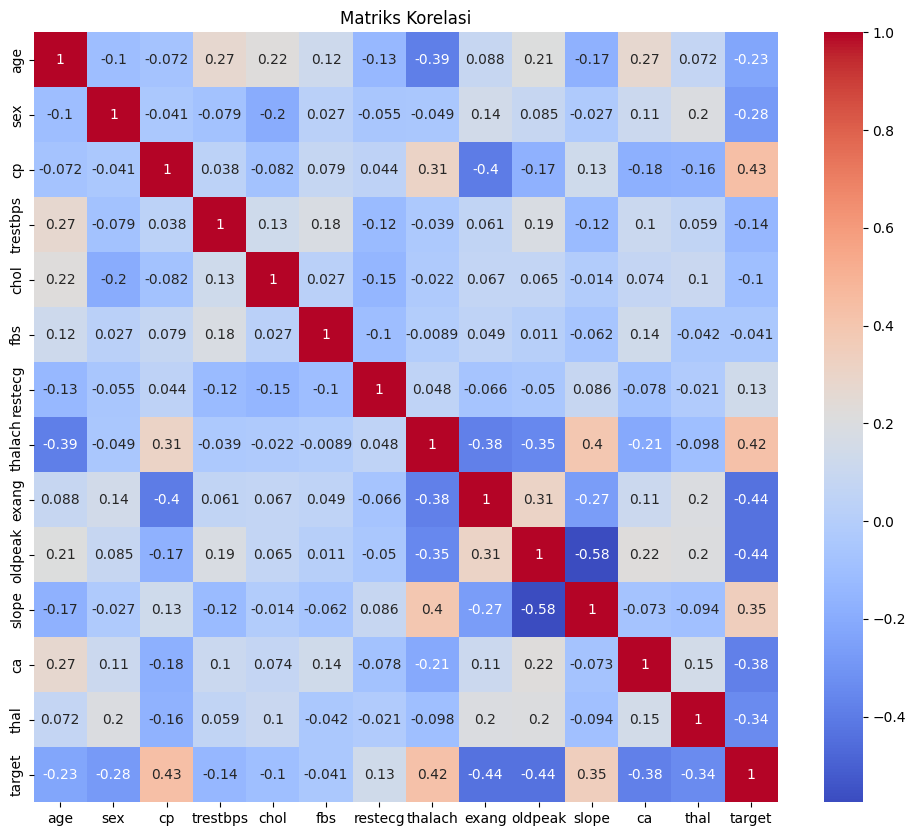

In [19]:
# (Opsional) Korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi'); plt.show()


### 1. Korelasi terhadap target

**Positif kuat:**

- cp (chest pain type) → 0.43

Semakin tinggi tipe nyeri dada (biasanya tipe tertentu terkait risiko), semakin besar kemungkinan pasien terdiagnosis penyakit jantung.

- thalach (max heart rate) → 0.42

Pasien dengan detak jantung maksimal tinggi cenderung lebih mungkin masuk kelas penyakit (tergantung konteks medis).

- slope (slope of peak exercise ST segment) → 0.35

Slope tertentu berkorelasi dengan kemungkinan penyakit jantung.

**Negatif kuat:**

- exang (exercise induced angina) → -0.44

Jika pasien mengalami angina saat olahraga, cenderung masuk kelas tanpa penyakit (tergantung coding data).

- oldpeak (ST depression) → -0.44

Nilai lebih tinggi cenderung mengurangi kemungkinan target = 1.

- ca (number of major vessels colored by fluoroscopy) → -0.38

Semakin banyak pembuluh besar terlihat, kemungkinan target = 1 menurun.

- thal (thalassemia type) → -0.34

- sex → -0.28 (1 = laki-laki, 0 = perempuan)

### 3. Implikasi ke Logistic Regression

- Fitur dengan korelasi tinggi terhadap target (cp, thalach, oldpeak, exang, slope) kemungkinan besar akan menjadi prediktor penting dalam model.

- Korelasi antar fitur yang tinggi (misalnya >0.7 atau <-0.7) bisa menyebabkan multikolinearitas. Pada heatmap ini, korelasi antar fitur cukup rendah, sehingga aman untuk dimasukkan semua ke model.

### 2. Hubungan antar fitur
- thalach dan age → korelasi negatif (-0.39) → semakin tua usia, detak jantung maksimal cenderung menurun.

- oldpeak dan slope → korelasi negatif (-0.58) → semakin tinggi depresi ST, slope biasanya lebih rendah.

- cp dan exang → korelasi negatif (-0.40) → tipe nyeri dada tertentu cenderung jarang diiringi angina saat olahraga.

In [20]:
# 5. Pre-processing: Pisah fitur & target
X = df.drop(columns='target')
y = df['target']

In [21]:
# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [22]:
# 7. Scaling fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# 8. Bangun & latih model logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
# 9. Evaluasi model
y_pred = model.predict(X_test_scaled)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8051948051948052

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



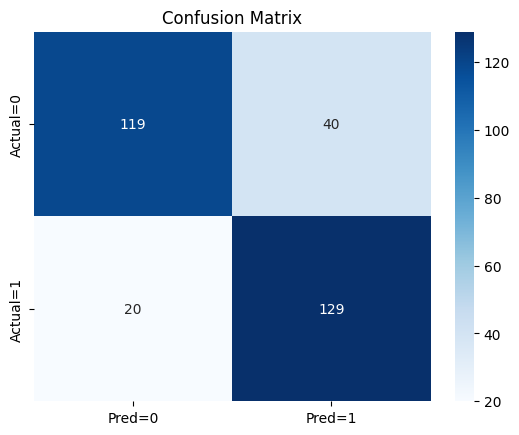

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred=0','Pred=1'],
            yticklabels=['Actual=0','Actual=1'])
plt.title('Confusion Matrix'); plt.show()

|              | Pred=0 | Pred=1 |
| ------------ | ------ | ------ |
| **Actual=0** | 119    | 40     |
| **Actual=1** | 20     | 129    |

- 119 orang sehat → ketebak bener sehat.

- 40 orang sehat → ketebak salah jadi sakit (false alarm).

- 129 orang sakit → ketebak bener sakit.

- 20 orang sakit → ketebak salah jadi sehat (missed case).

Model nya udah lumayan okey, bisa nangkep yang sakit tapi juga terkadang suka nandain orang sehat jadi sakit juga.


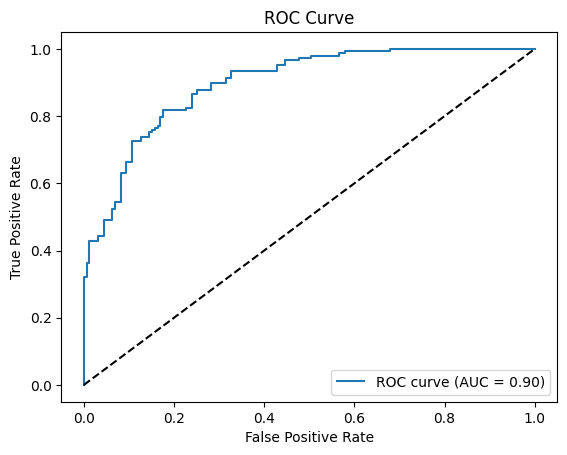

In [26]:
# 10. ROC Curve & AUC
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve'); plt.legend(); plt.show()

Gambar ini buat nunjukkin seberapa hebat model bedain orang sakit vs orang sehat di semua batas nilai prediksi.

- AUC = 0.90 → ini keren, artinya 90% waktu model bisa ngebedain yang sakit sama yang sehat dengan benar.

- Garis biru makin deket pojok kiri atas → makin mantap karena itu berarti true positive tinggi dan false positive rendah.

- Garis putus-putus cuma acuan model random (AUC = 0.5).